In [1]:
import os

# 获取当前工作目录

current_directory = os.getcwd()

print("当前工作目录:", current_directory)

当前工作目录: D:\Data\Shap


In [2]:
import pandas as pd
          
import numpy as np

import matplotlib.pyplot as plt
          
from sklearn.model_selection import train_test_split   

In [3]:
# 设置字体为新罗马数字
plt.rcParams['font.family'] = 'Times New Roman'

# 处理负号          
plt.rcParams['axes.unicode_minus'] = False

# 忽略警告
import warnings
          
warnings.filterwarnings("ignore")

In [4]:
# 读取数据

df = pd.read_csv('Data_target.csv')

# 删除 NaN 值

df.dropna(inplace=True)

# 检查是否还存在缺失值 print(df.isnull().sum())

In [5]:
# 划分特征和目标变量 

# 删除 'target' 列

X = df.drop(['Target'], axis=1)        

# 获取 'target' 列作为目标变量

y = df['Target']  

In [6]:
# 划分训练集和测试集      
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state=42, 
                                                    stratify=df['Target'])
# 观察前几行
df.head()

Size  Thick   Doi  TB   BASO  Grade   PNI  LVI  Target
0   1.5   0.61  0.38   2  0.732       2    0    0       0
1   1.6   0.50  0.30   1  0.418       2    0    0       0
2   1.5   1.09  0.02   1  0.845       2    0    0       0
3   1.0   0.71  0.31   1  1.090       2    0    0       0
4   2.8   0.81  0.32   2  0.135       2    0    0       0

In [39]:
print(df)

     Size  Thick   Doi  TB   BASO  Grade   PNI  LVI  Target
0     1.5   0.61  0.38   2  0.732       2    0    0       0
1     1.6   0.50  0.30   1  0.418       2    0    0       0
2     1.5   1.09  0.02   1  0.845       2    0    0       0
3     1.0   0.71  0.31   1  1.090       2    0    0       0
4     2.8   0.81  0.32   2  0.135       2    0    0       0
..    ...    ...   ...  ..    ...     ...  ...  ...     ...
549   2.0   0.92  1.00  13  1.198       1    0    0       0
550   3.5   0.90  0.49  28  0.975       1    0    0       0
551   2.5   0.60  0.80  16  0.455       1    0    0       0
552   1.3   0.68  0.50  32  0.428       2    0    0       0
553   4.0   0.98  0.87  30  0.275       2    1    0       1

[554 rows x 9 columns]


In [7]:
from sklearn.ensemble import RandomForestRegressor

In [8]:
# 创建随机森林回归器实例，并设置参数
rf_regressor = RandomForestRegressor ( 
    
    n_estimators=100,               # 'n_estimators'是森林中树的数量。默认是100，可以根据需要调整。    
    
    criterion='squared_error',      # 'criterion'参数指定用于拆分的质量指标。'squared_error'（默认）表示使用均方误差，另一选项是'absolute_error'。    max_depth=None,           # 'max_depth'限制每棵树的最大深度。'None'表示不限制深度。    min_samples_split=2,      # 'min_samples_split'指定一个节点分裂所需的最小样本数。默认是2。    
    
    min_samples_leaf=1,             # 'min_samples_leaf'指定叶子节点所需的最小样本数。默认是1。    
    
    min_weight_fraction_leaf=0.0,   # 'min_weight_fraction_leaf'与'min_samples_leaf'类似，但基于总样本权重。默认是0.0。    
    
    random_state=42,                # 'random_state'控制随机数生成，以便结果可复现。42是一个常用的随机种子。    
    
    max_leaf_nodes=None,           #  'max_leaf_nodes'限制每棵树的最大叶子节点数。'None'表示不限制。    
    
    min_impurity_decrease=0.0      # 'min_impurity_decrease'在分裂节点时要求的最小不纯度减少量。默认是0.0。

)

In [9]:
# 训练模型
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [10]:
# 获取随机森林模型的特征贡献度（重要性）      
feature_importances = rf_regressor.feature_importances_
          
# 将特征和其重要性一起排序         
sorted_indices = np.argsort(feature_importances)[::-1]  # 逆序排列，重要性从高到低
          
sorted_features = X_train.columns[sorted_indices]
          
sorted_importances = feature_importances[sorted_indices]
          
# 绘制按重要性排序的特征贡献性柱状图        
plt.figure(figsize=(10, 6), dpi=1200) 
          
# 使用渐变色，确保最高值为红色
bars = plt.barh(sorted_features, sorted_importances, color="steelblue")

# 添加坐标轴标签
plt.xlabel('Importance',fontsize=10,fontweight='bold')

plt.ylabel('Feature',fontsize=10,fontweight='bold')

# 设置坐标轴刻度标签的字体大小
plt.tick_params(axis='both', labelsize=8)  # 设置x轴和y轴的刻度标签字体大小

# 设置标题
plt.title(f'RandomForest',loc='left', fontsize=10, fontweight='bold')

# 保存图像为 PDF 文件        
plt.gca().invert_yaxis()
          
# 显示图表        
plt.show()

In [11]:
# 开始计算Shap值

import shap
          
explainer = shap.TreeExplainer(rf_regressor)
          
# 计算shap值为Explanation格式
          
shap_values_Explanation = explainer(X)


In [54]:
explainer = shap.TreeExplainer(rf_regressor)

shap_values = explainer.shap_values(X)

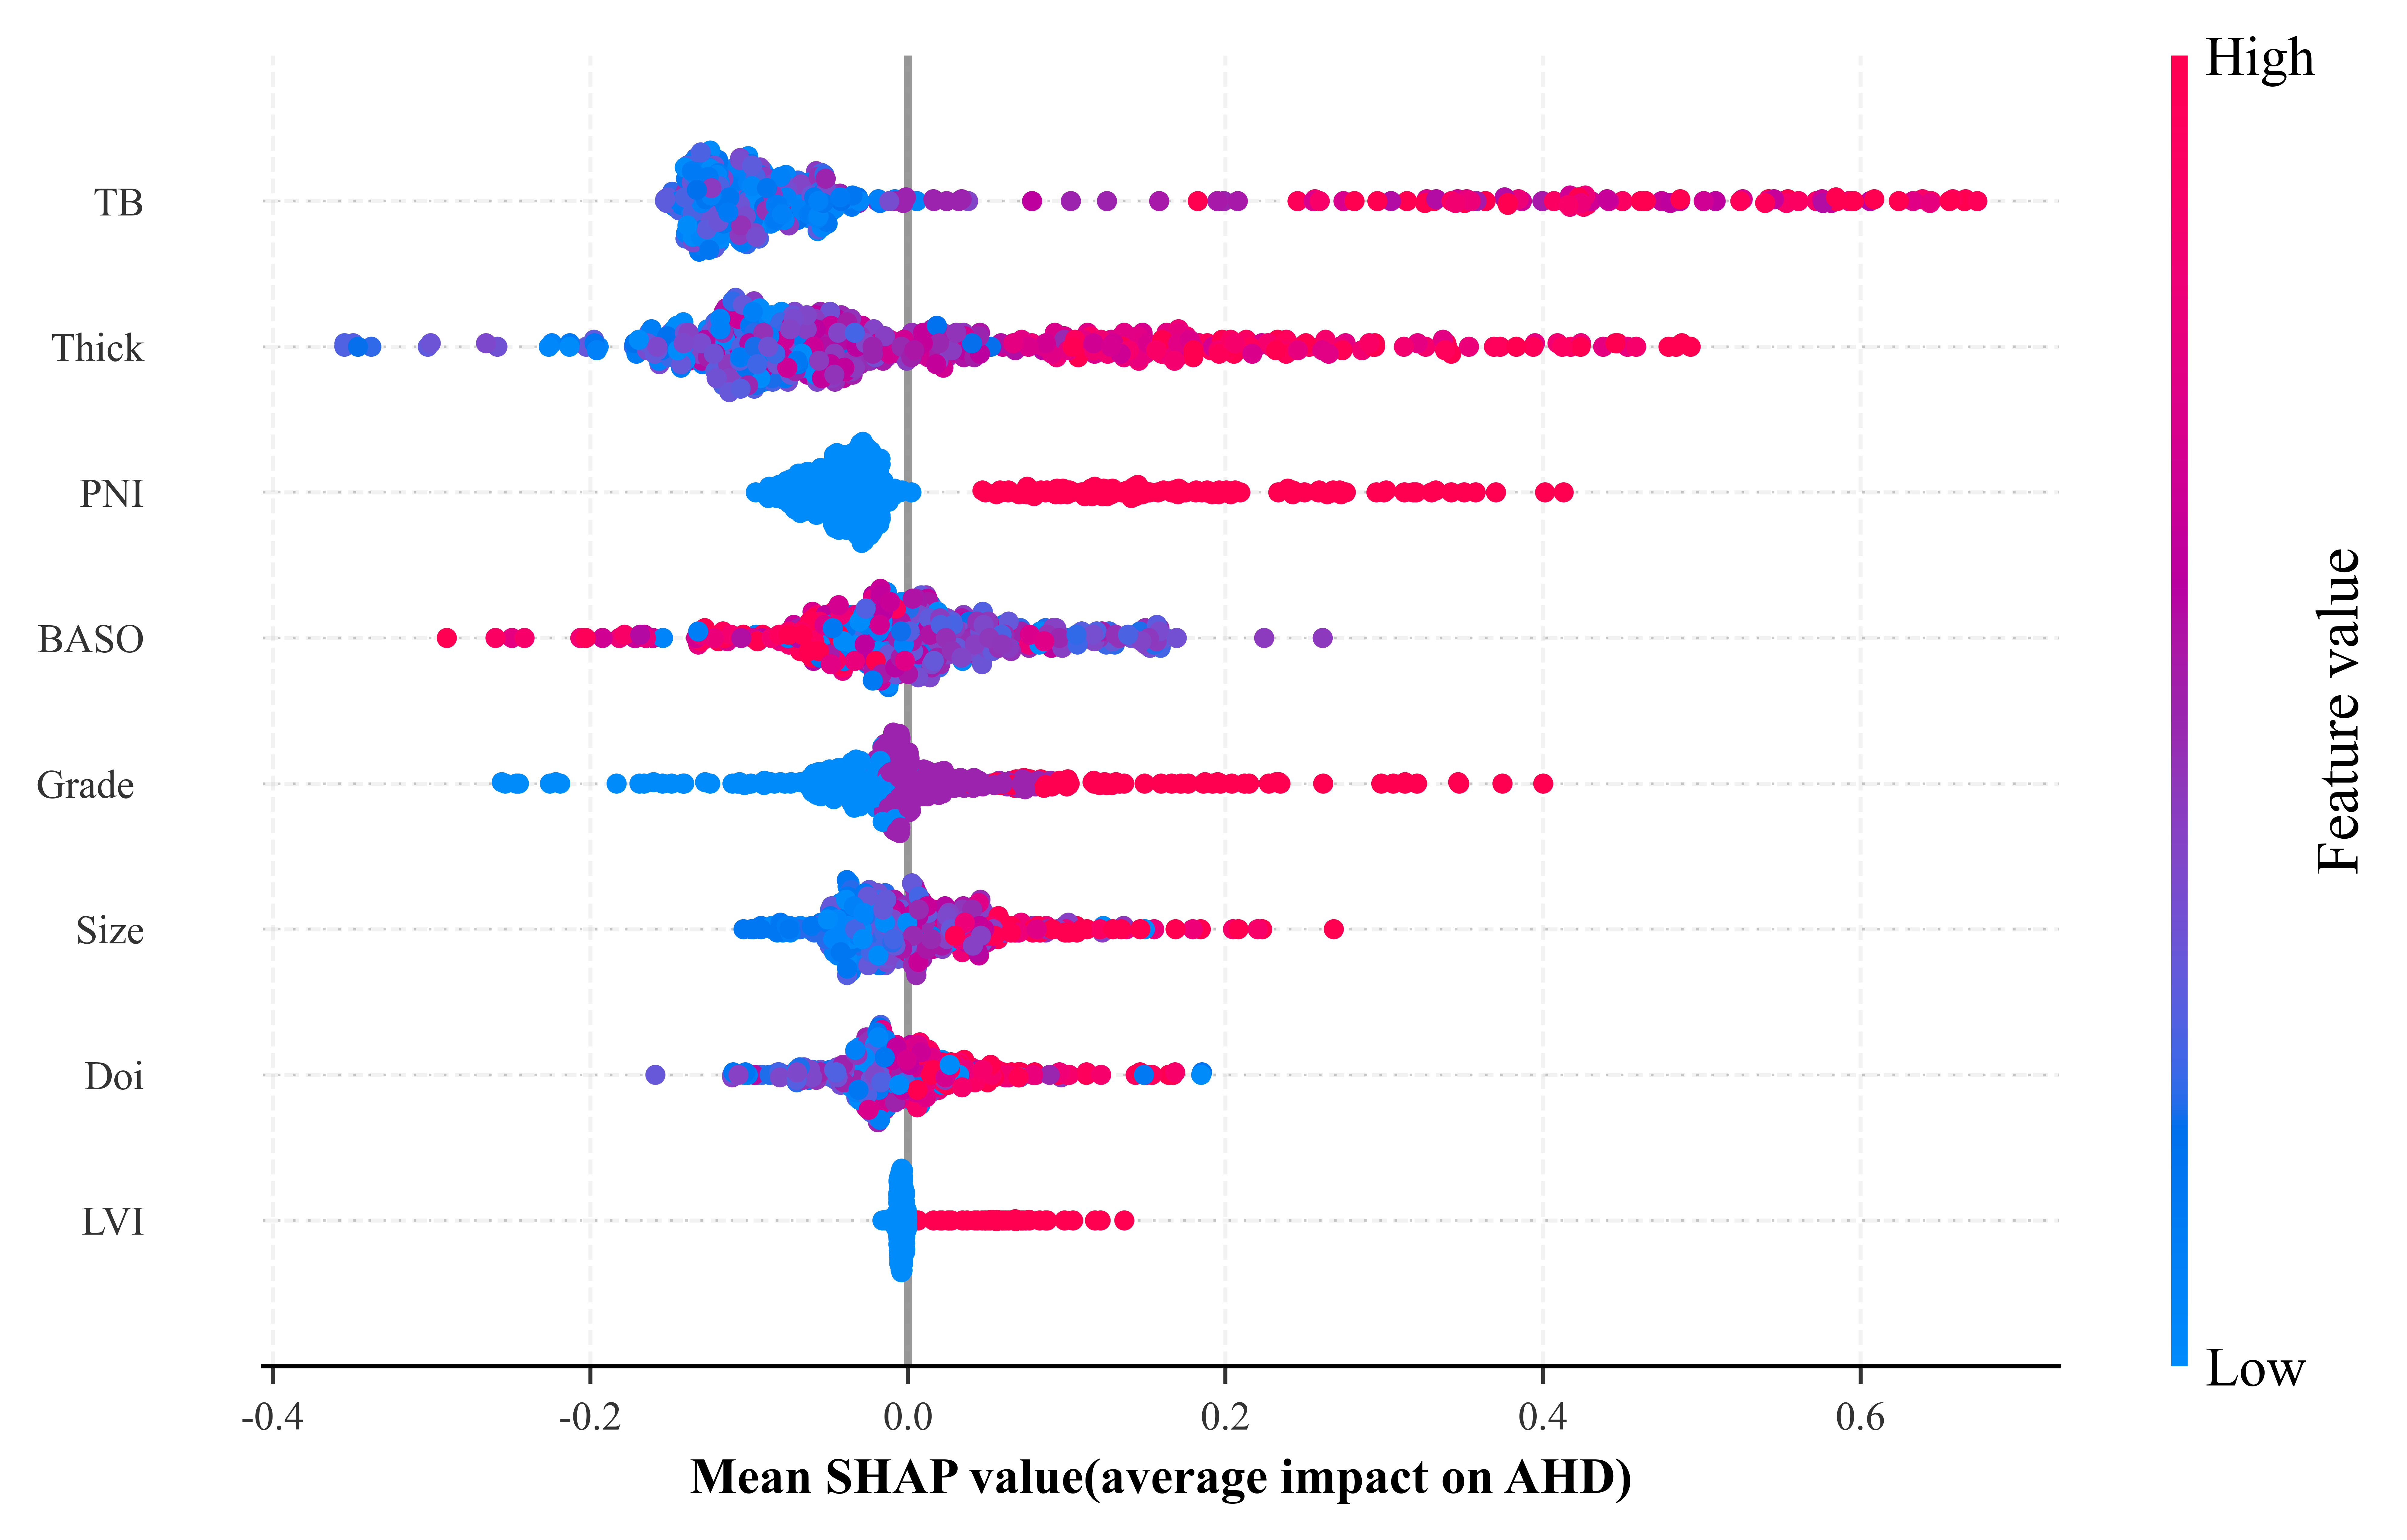

In [12]:
# 宽度为6英寸，高度为8英寸,分辨率为1200
plt.figure(figsize=(6, 8), dpi=1200)
          
# 绘制蜂群图，并设置 show=False 以避免直接显示         
shap.plots.beeswarm(shap_values_Explanation, show=False,max_display=13)
   
# 开启网格线
plt.grid(visible=True, linestyle='--', color='gray', alpha=0.1)  

# 添加坐标轴标签
plt.xlabel('Mean SHAP value(average impact on AHD)',fontsize=10,fontweight='bold')

plt.ylabel('',fontsize=10,fontweight='bold')

# 设置坐标轴刻度标签的字体大小
plt.tick_params(axis='both', labelsize=8)  # 设置x轴和y轴的刻度标签字体大小

# 设置标题
plt.title(f'',loc='left', fontsize=10, fontweight='bold')

# 保存图像为 PDF 文件

plt.show()

In [13]:
# 设置 max_display 值
max_display = 13

# 创建图形
plt.figure(figsize=(6,8), dpi=1200)

# 创建 SHAP 值条形图，并使用 max_display 参数限制最多显示的特征数量
shap.plots.bar(shap_values_Explanation, max_display=max_display, show=False)

# 获取当前图形的 Axes
ax = plt.gca()

# 隐藏条形图后面的数字

for text in ax.texts:
    text.set_visible(False)
    
# 获取 SHAP 值并进行排序
shap_values_sorted = shap_values_Explanation.values.flatten()
sorted_indices = np.argsort(shap_values_sorted)[::-1]  # 逆序排列
sorted_shap_values = shap_values_sorted[sorted_indices][:max_display]

# 创建从蓝色到红色的渐变色
colors = plt.cm.autumn(np.linspace(0, 1, max_display))

# 应用颜色到条形图
for i, bar in enumerate(ax.patches):
    bar.set_facecolor(colors[i])

# 添加坐标轴标签
plt.xlabel('Mean SHAP value(average impact on AHD)',fontsize=10)

plt.ylabel('',fontsize=10)

# 设置坐标轴刻度标签的字体大小
plt.tick_params(axis='both', labelsize=10)  # 设置x轴和y轴的刻度标签字体大小

# 设置标题
plt.title(f'',loc='left', fontsize=10, fontweight='bold')

# 保存图像为 PDF 文件

plt.tight_layout()

plt.show()

In [36]:
plt.figure(figsize=(6, 8), dpi=1200)
          
# 绘制第1个样本的 SHAP 瀑布图，并设置 show=False 以避免直接显示         
shap.plots.waterfall(shap_values_Explanation[265], show=False, max_display=10)

# 添加坐标轴标签
plt.xlabel('Shaply',fontsize=10,fontweight='bold')

plt.ylabel('Feature',fontsize=10,fontweight='bold')

# 设置坐标轴刻度标签的字体大小
plt.tick_params(axis='both', labelsize=8)  # 设置x轴和y轴的刻度标签字体大小

# 设置标题
plt.title(f'',loc='left', fontsize=10, fontweight='bold')
          
# 保存图像为 PDF 文件       
          
plt.tight_layout()
          
plt.show()

In [37]:
shap_values_Explanation

.values =
array([[-1.72806835e-02, -1.05831116e-01, -2.10655966e-02, ...,
        -1.35858330e-02, -2.80273493e-02, -4.71763449e-03],
       [-1.34260597e-02, -1.34066713e-01, -1.92726547e-02, ...,
        -1.43998060e-02, -3.31064457e-02, -3.54265468e-03],
       [-5.63164925e-02,  9.26034409e-02, -3.07583220e-02, ...,
         9.22937154e-03, -3.92516304e-02, -1.18188413e-03],
       ...,
       [-8.65540781e-05, -3.54838808e-01,  1.86143317e-02, ...,
        -6.13993789e-02, -3.18173331e-02, -5.95486244e-03],
       [-1.63382519e-02, -2.58471123e-01, -6.43748422e-02, ...,
         1.00481042e-02, -2.25187900e-02, -5.29280644e-03],
       [ 6.52036301e-02,  2.92416553e-02,  3.03690408e-02, ...,
         9.53534030e-04,  1.17301050e-01, -4.05250319e-04]])

.base_values =
array([0.34762274, 0.34762274, 0.34762274, 0.34762274, 0.34762274,
       0.34762274, 0.34762274, 0.34762274, 0.34762274, 0.34762274,
       0.34762274, 0.34762274, 0.34762274, 0.34762274, 0.34762274,
       0.3476227

In [50]:
plt.figure(figsize=(6, 8), dpi=1200)
          
# 绘制第1个样本的 SHAP 瀑布图，并设置 show=False 以避免直接显示         
shap.plots.waterfall(shap_values_Explanation[519], show=False, max_display=10)

# 添加坐标轴标签
plt.xlabel('Shaply',fontsize=10,fontweight='bold')

plt.ylabel('Feature',fontsize=10,fontweight='bold')

# 设置坐标轴刻度标签的字体大小
plt.tick_params(axis='both', labelsize=8)  # 设置x轴和y轴的刻度标签字体大小

# 设置标题
plt.title(f'',loc='left', fontsize=10, fontweight='bold')
          
# 保存图像为 PDF 文件       
          
plt.tight_layout()
          
plt.show()

In [63]:
from sklearn.ensemble import RandomForestClassifier

In [101]:
# 使用随机森林建模
model_rf = RandomForestClassifier(
    
                                  n_estimators=100, 
                                  
                                  criterion='gini', 
                                  
                                  bootstrap=True, 
                                  
                                  max_depth=3, 
                                  
                                  random_state=8
                                 
                                   )

In [117]:
from sklearn.model_selection import GridSearchCV  # 导入 GridSearchCV
from sklearn.ensemble import RandomForestClassifier  # 导入随机森林分类器
from sklearn.datasets import load_iris  # 导入示例数据集
from sklearn.model_selection import train_test_split  # 用于划分训练集和测试集


In [118]:
# 初始化随机森林分类器
model_rf = RandomForestClassifier(random_state=8)

# 设置需要调优的参数网格
param_grid = {
    'n_estimators': [50, 100, 200],         # 树的数量
    'max_depth': [3, 5, 10, None],          # 树的最大深度
    'min_samples_split': [2, 5, 10],         # 内部节点再划分所需的最小样本数
    'min_samples_leaf': [1, 2, 4],           # 叶子节点最小样本数
    'bootstrap': [True, False],              # 是否使用自助采样
    'criterion': ['gini', 'entropy']        # 分裂标准
}

# 使用GridSearchCV来寻找最优的超参数
grid_search = GridSearchCV(estimator=model_rf, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)

# 拟合模型
grid_search.fit(X_train, y_train)

# 打印最优参数和评分
print("最优参数: ", grid_search.best_params_)
print("最优得分: ", grid_search.best_score_)


Fitting 5 folds for each of 432 candidates, totalling 2160 fits
最优参数:  {'bootstrap': False, 'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}
最优得分:  0.8684315684315683


In [119]:
# 获取最优模型
best_model = grid_search.best_estimator_

# 在测试集上进行预测
y_pred = best_model.predict(X_test)

# 评估模型（例如，计算准确率）
from sklearn.metrics import accuracy_score
print("测试集准确率: ", accuracy_score(y_test, y_pred))

测试集准确率:  0.7664670658682635


In [ ]:
model_rf.fit(X, y)

In [120]:
best_model.fit(X, y)

RandomForestClassifier(bootstrap=False, max_depth=10, min_samples_leaf=2,
                       n_estimators=50, random_state=8)

In [121]:
import shap
explainer = shap.TreeExplainer(best_model)
# 计算shap值为Explanation格式
shap_values_Explanation = explainer(X)
print("RF模型Explanation格式维度:",shap_values_Explanation.shape)

RF模型Explanation格式维度: (554, 8, 2)


In [122]:
# 提取类别 0 的 SHAP 值
shap_values_class_0 = shap_values_Explanation[:, :, 0]
# 提取类别 1 的 SHAP 值
shap_values_class_1 = shap_values_Explanation[:, :, 1]

In [127]:
plt.figure(figsize=(10, 5), dpi=1200)
# 绘制第3个样本0类别的 SHAP 瀑布图
shap.plots.waterfall(shap_values_class_0[494], show=False, max_display=13)
plt.tight_layout()
plt.show()

In [126]:
plt.figure(figsize=(10, 5), dpi=1200)
# 绘制第3个样本1类别的 SHAP 瀑布图
shap.plots.waterfall(shap_values_class_1[494], show=False, max_display=13)
plt.tight_layout()
plt.show()